['ica', 0, 6.067076319739932, 5.7358715317466045, 6.431401586532592, 0.24683726110576787, 0.5443814927419532, 0.00019387354286957054]
['ica', 0.05, 6.048176231838408, 5.619812965393066, 6.519375824928284, 0.29032274570207006, 0.5700561997772393, 8.117425688784259e-05]
['ica', 0.1, 5.97016735020138, 5.2685589302669875, 6.741936612129211, 0.2059620070078071, 0.5170904417291423, 0.000454244261535838]
['ica', 0.15, 5.808876412255423, 5.023615923794833, 6.672662949562072, 0.2759465752573873, 0.5582700535756585, 0.00012213362466737202]
['ica', 0.2, 6.00398861510413, 5.185760449279439, 6.904039597511291, 0.2079396653705794, 0.49672816717594515, 0.0008196066860753369]
['ica', 0.25, 5.959727251813526, 5.199947072701021, 6.7954854488372805, 0.2131632014633117, 0.5121654237359091, 0.000525721768206303]
['ica', 0.3, 6.017341151123955, 5.332887828350067, 6.770239806175232, 0.25019026305392555, 0.5338176110323521, 0.00027188674233303694]
['ica', 0.35, 5.904262275922866, 4.875920761715282, 7.03543794

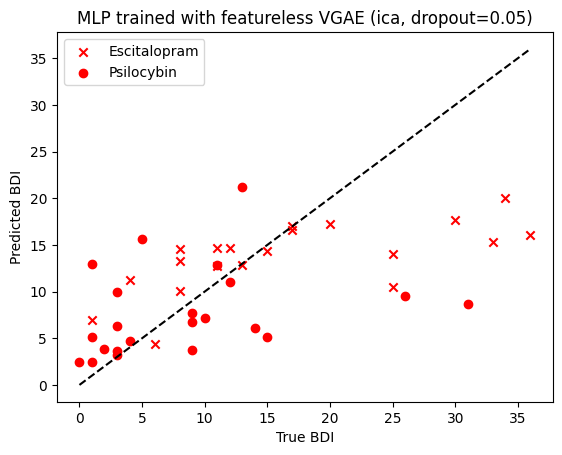

['schaefer', 0, 6.162335793177287, 5.720138268037275, 6.648753070831299, 0.27362183803051854, 0.57452725550639, 6.92360595637883e-05]
['schaefer', 0.05, 6.070556033225286, 5.601993896744468, 6.585974383354187, 0.26383898838241326, 0.5894402280414653, 4.003831209719288e-05]
['schaefer', 0.1, 6.161817380360195, 5.823800412091342, 6.533636045455933, 0.28674031383250254, 0.5640268458603085, 0.00010023441725856258]
['schaefer', 0.15, 6.08996445792062, 5.8128578879616475, 6.394781684875488, 0.3045882631586163, 0.5898673382059672, 3.939945156615567e-05]
['schaefer', 0.2, 6.090546392259144, 5.74349232153459, 6.472305870056152, 0.2935081622261456, 0.5714115514995572, 7.737153957530482e-05]
['schaefer', 0.25, 6.097958235513596, 5.810464252125133, 6.414201617240906, 0.27984558924685377, 0.5758221746113189, 6.608997584446667e-05]
['schaefer', 0.3, 6.091637986046927, 5.7595928799022325, 6.456887602806091, 0.26783268342096933, 0.5649118842828662, 9.720359614158241e-05]
['schaefer', 0.35, 6.112740119

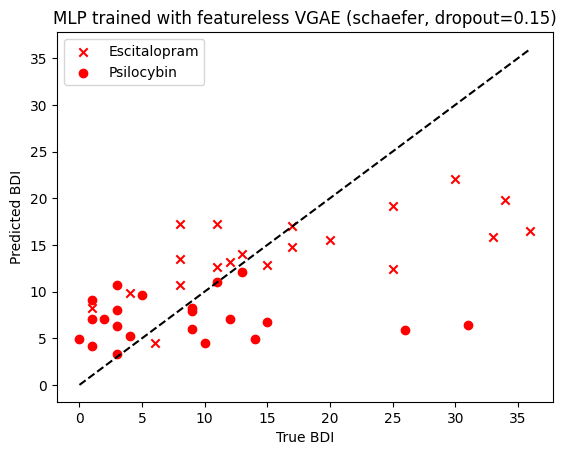

['aal', 0, 5.8228478999364945, 5.688218539411372, 5.97094019651413, 0.3150057728134794, 0.5852018755798769, 4.6909887796117296e-05]
['aal', 0.05, 5.997511625289917, 6.180876769802787, 5.79580996632576, 0.3066417035350617, 0.572885282904475, 7.342098519017815e-05]
['aal', 0.1, 6.136877448785873, 6.085195162079551, 6.193727964162827, 0.2658088042047011, 0.5402147331517348, 0.00022183505841300258]
['aal', 0.15, 5.967628562734241, 6.066222418438304, 5.85917532145977, 0.2682193625891768, 0.5350063289885596, 0.0002618801793356988]
['aal', 0.2, 5.946694024971554, 5.838535065000707, 6.065668880939484, 0.2484930772756926, 0.5342681107499018, 0.0002680546236809414]
['aal', 0.25, 5.922954582032704, 5.50986939126795, 6.377348291873932, 0.2994054531889768, 0.5772092463018996, 6.286471412414094e-05]
['aal', 0.3, 6.09199131102789, 5.691882241855968, 6.532111287117004, 0.22981674079331693, 0.5285812141328841, 0.00032019395938511874]
['aal', 0.35, 5.893438872836885, 5.398013093254783, 6.438407230377197

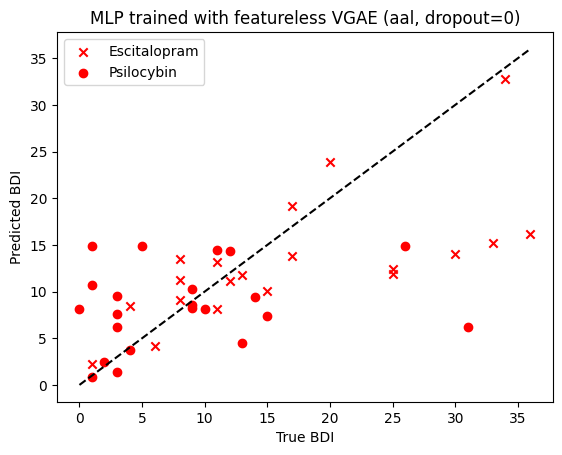

In [7]:
import csv
import os
import sys
sys.path.append('../')
from utils import project_root
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

root = project_root()

# Specify the filename of the CSV file
csv_filename = 'nonf_vgae_results.csv'

rows = [['Atlas', 'Dropout', 'MAE', 'Psilo MAE', 'Escitalopram MAE', 'R2', 'Pearson R', 'p-value']]

for atlas in ['ica', 'schaefer', 'aal']:
    r2_scores = []
    maes = []
    corrs = []
    ps = []
    
    best_r2 = -float('inf')
    
    for dropout in [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:

        filename = os.path.join(root, 'vgae_mlp_results', f'featureless-vgae-{atlas}-{dropout}-results.csv')
        # Initialize lists to store data
        true_values = []
        predicted_values = []
        drug_values = []

        # Read data from the CSV file
        with open(filename, 'r') as file:
            reader = csv.reader(file)
            next(reader)  # Skip the header row
            for row in reader:
                true_values.append(float(row[0]))
                predicted_values.append(float(row[1]))
                drug_values.append(float(row[2]))

        mae = mean_absolute_error(true_values, predicted_values)
        r2 = r2_score(true_values, predicted_values)
        corr, p = pearsonr(true_values, predicted_values)
        
        true_values = np.array(true_values)
        predicted_values = np.array(predicted_values)
        drug_values = np.array(drug_values)
        
        psilo_indices = np.where(drug_values==1)
        esc_indices = np.where(drug_values==-1)
        
        psilo_true = true_values[psilo_indices]
        psilo_pred = predicted_values[psilo_indices]
        
        
        esc_true = true_values[esc_indices]
        esc_pred = predicted_values[esc_indices]
        
        psilo_mae = mean_absolute_error(psilo_true, psilo_pred)
        esc_mae = mean_absolute_error(esc_true, esc_pred)
        
        rows.append([atlas, dropout, mae, psilo_mae, esc_mae, r2, corr, p])
        
        print(rows[-1])
        
        if r2 > best_r2:
            best_model = (true_values, predicted_values, drug_values, dropout)
            best_r2 = r2

            
    (true_values, predicted_values, drug_values, dropout) = best_model
    # Plot the graph
    for t, p, d in zip(true_values, predicted_values, drug_values):
        marker = 'x' if d == -1 else 'o'
        plt.scatter(t, p, color='red', marker=marker)
    plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'k--')

    plt.xlabel('True BDI')
    plt.ylabel('Predicted BDI')
    plt.title(f'MLP trained with featureless VGAE ({atlas}, dropout={dropout})')
    plt.legend(['Escitalopram', 'Psilocybin'])
    plt.savefig(os.path.join(root, f'images/mlp_{dropout}_{atlas}_featureless_vgae.png'), bbox_inches='tight')
    plt.show()

# Write the rows to a CSV file
with open(csv_filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)
